In [19]:
# Read in data
with open("C:/Users/anon/Desktop/Fyp/sniffer-20180327-4flifts.LOG") as f:
    log_4flifts = f.readlines()
with open("C:/Users/anon/Desktop/Fyp/sniffer-20180327-4flobby.LOG") as f:
    log_4flobby = f.readlines()

In [22]:
print(len(log_4flifts))
print(len(log_4flobby))

45184
68656


In [3]:
log_file = open("C:/Users/anon/Desktop/Fyp/SNIFFERsandiskfat.LOG")
# Define log_file as open("...") first
# Look for data rollovers, if the roll over value is near 2**32 it is an overflow, otherwise it is a reboot
lf_linenum = 0
last_timestamp = 0
for lf_line in log_file:
    lf_linenum += 1
    try:
        this_timestamp = int(lf_line[:10])
    except ValueError:
        continue
    if last_timestamp > this_timestamp:
        print("Wrapped at line %d (%d -> %d)"%(lf_linenum,last_timestamp,this_timestamp))
    last_timestamp = this_timestamp

Wrapped at line 6663 (88023099 -> 5559293)
Wrapped at line 12695 (227216543 -> 201747881)
Wrapped at line 12706 (201761649 -> 81064987)
Wrapped at line 13132 (87525657 -> 48022574)
Wrapped at line 23232 (208744193 -> 3923104)
Wrapped at line 43246 (218464031 -> 35852657)
Wrapped at line 43254 (35868613 -> 12462143)
Wrapped at line 50422 (56878787 -> 7032284)
Wrapped at line 50478 (43281633 -> 5811598)
Wrapped at line 50486 (16486127 -> 2291420)
Wrapped at line 51542 (31726924 -> 7248679)
Wrapped at line 54206 (274646769 -> 16659028)
Wrapped at line 96414 (216351408 -> 38446852)
Wrapped at line 108350 (238683474 -> 11121184)
Wrapped at line 370621 (1683786300 -> 14829846)
Wrapped at line 370659 (18250744 -> 10463321)
Wrapped at line 394020 (237364180 -> 32313296)
Wrapped at line 394074 (37517818 -> 5266461)
Wrapped at line 460890 (1267148161 -> 103555128)
Wrapped at line 466022 (906803369 -> 16161594)
Wrapped at line 466038 (40586975 -> 5643897)
Wrapped at line 466054 (14993800 -> 76794

In [49]:
# Convert lines of frame to Python dictionaries
def sniffer_log_to_dict(sniffer_log: "List[Str]") -> "List[Dict]":
    ret_dicts = []
    last_timestamp = 0
    overflow_counts = 0
    for l in sniffer_log:
        ret_dict = {}
        this_timestamp = int(l[:10])/1e6
        if last_timestamp > this_timestamp:
            # Overflow, add 2**32
            overflow_counts += 1
        last_timestamp = this_timestamp
        this_timestamp += 2**32/1e6*overflow_counts
        ret_dict["timestamp"] = this_timestamp
        ret_dict["channel"] = int(l[13:15])
        ret_dict["rssi"] = int(l[18:21])
        ret_dict["frame_type"] = l[22:24]
        ret_dict["ds_flag"] = l[25:27]
        ret_dict["dest_mac"] = l[28:40]
        ret_dict["src_mac"] = l[41:53]
        ret_dicts += [ret_dict]
    return ret_dicts

In [50]:
dicts_4flifts = sniffer_log_to_dict(log_4flifts)
dicts_4flobby = sniffer_log_to_dict(log_4flobby)

In [53]:
max(d["timestamp"] for d in dicts_4flifts)

42323.348533000004

In [75]:
from collections import Counter
c_lifts = Counter(d["src_mac"] for d in dicts_4flifts)
c_lobby = Counter(d["src_mac"] for d in dicts_4flobby)

In [77]:
print(c_lifts.most_common(10))
print(c_lobby.most_common(10))


[('f4428f78b4a', 3226), ('36ce000176b', 3207), ('484baac2f73', 2358), ('c0cecdc064a', 1612), ('60a4d09ad47', 1214), ('01016427ff3', 1157), ('38a4ed57399', 800), ('bc8385ee825', 783), ('00000000010', 636), ('aced5cb77ba', 620)]
[('b0594728019', 5291), ('c0cecdc064a', 3215), ('c488e512fb1', 2930), ('484baac2f73', 2910), ('24ce142dff3', 2026), ('e0cbeeb3e78', 2001), ('141f78e4cb5', 1819), ('0607e42dff3', 1297), ('509ea70d80e', 1185), ('0000442bff3', 911)]


In [98]:
xy_interested = [(d["timestamp"],d["rssi"]) for d in dicts_4flifts if '01016427ff3' in d["src_mac"]]

In [66]:
xy_interested[0]

(793.752495, -94)

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

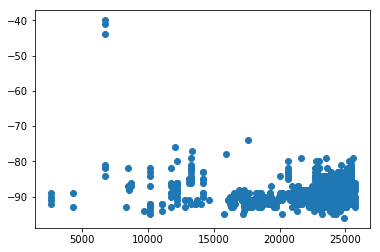

In [99]:
plt.scatter(*list(zip(*xy_interested)))